<a href="https://colab.research.google.com/github/Dhairyakumarshah/Satellite_Risk_prediction_/blob/main/Isro_satellite_safety_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install skyfield

In [12]:
import pandas as pd
import requests
import os

# Create 'data' folder if it doesn't exist
os.makedirs("data", exist_ok=True)

# URL for all ISRO satellites TLEs (example: IRNSS series)
url = "https://celestrak.com/NORAD/elements/gp.php?GROUP=irnss&FORMAT=tle"

response = requests.get(url)
tle_lines = response.text.strip().splitlines()

data = []
for i in range(0, len(tle_lines), 3):
    name = tle_lines[i].strip()
    line1 = tle_lines[i+1].strip()
    line2 = tle_lines[i+2].strip()
    data.append({"satellite_name": name, "tle_line1": line1, "tle_line2": line2})

df = pd.DataFrame(data)
df.to_csv("data/ISRO_TLEs.csv", index=False)
print(df.head())



  satellite_name                                          tle_line1  \
0       IRNSS-1A  1 39199U 13034A   25314.89671615  .00000072  0...   
1       IRNSS-1B  1 39635U 14017A   25314.89662948  .00000093  0...   
2       IRNSS-1C  1 40269U 14061A   25314.97358991 -.00000164  0...   
3       IRNSS-1E  1 41241U 16003A   25310.80826755 -.00000300  0...   
4       IRNSS-1F  1 41384U 16015A   25315.17751772  .00000156  0...   

                                           tle_line2  
0  2 39199  35.2358  67.0120 0021891 184.0934 177...  
1  2 39635  28.8838 244.1388 0018518 187.0487 356...  
2  2 40269   5.9580  93.2617 0018346   3.9136  26...  
3  2 41241  32.7471  62.9748 0022889 183.7875 202...  
4  2 41384   4.8003 102.0920 0021011 178.7482 226...  


In [14]:
from skyfield.api import EarthSatellite, load
import pandas as pd

# Load CSV
df = pd.read_csv("data/ISRO_TLEs.csv")
ts = load.timescale()

names, altitudes, inclinations, eccentricities = [], [], [], []

for i in range(len(df)):
    sat = EarthSatellite(df.loc[i, 'tle_line1'], df.loc[i, 'tle_line2'], df.loc[i, 'satellite_name'], ts)
    subpoint = sat.at(ts.now()).subpoint()  # geodetic point (lat, lon, elevation)

    lat = subpoint.latitude.degrees
    lon = subpoint.longitude.degrees
    alt = subpoint.elevation.km  # THIS is correct

    names.append(df.loc[i, 'satellite_name'])
    altitudes.append(alt)
    inclinations.append(sat.model.inclo * 180/3.14159)  # radians → degrees
    eccentricities.append(sat.model.ecco)

df_orbits = pd.DataFrame({
    "satellite_name": names,
    "altitude_km": altitudes,
    "inclination_deg": inclinations,
    "eccentricity": eccentricities
})

df_orbits.to_csv("data/ISRO_Orbital_Params.csv", index=False)
print(df_orbits)


      satellite_name   altitude_km  inclination_deg  eccentricity
0           IRNSS-1A  35822.488968        35.235830      0.002189
1           IRNSS-1B  35766.594018        28.883824      0.001852
2           IRNSS-1C  35759.624049         5.958005      0.001835
3           IRNSS-1E  35724.522813        32.747128      0.002289
4           IRNSS-1F  35870.566342         4.800304      0.002101
5           IRNSS-1G  35783.680543         4.657504      0.000209
6           IRNSS-1I  35826.048791        29.075525      0.002143
7  NVS-01 (IRNSS-1J)  35761.439099         2.697502      0.000768
8  NVS-02 (IRNSS-1K)  30844.365286        21.053818      0.735018


In [15]:
import pandas as pd
import requests
import os

# 1️⃣ Create folder to save data
os.makedirs("data", exist_ok=True)

# 2️⃣ URL for ISRO satellites TLEs (IRNSS series as example)
url = "https://celestrak.com/NORAD/elements/gp.php?GROUP=irnss&FORMAT=tle"

# 3️⃣ Fetch TLE text from Celestrak
response = requests.get(url)
tle_lines = response.text.strip().splitlines()

# 4️⃣ Process TLE lines: every 3 lines = name, line1, line2
data = []
for i in range(0, len(tle_lines), 3):
    name = tle_lines[i].strip()
    line1 = tle_lines[i+1].strip()
    line2 = tle_lines[i+2].strip()
    data.append({"satellite_name": name, "tle_line1": line1, "tle_line2": line2})

# 5️⃣ Convert to DataFrame and save CSV
df = pd.DataFrame(data)
df.to_csv("data/ISRO_TLEs.csv", index=False)

print("Step 1 Complete: ISRO TLEs saved to 'data/ISRO_TLEs.csv'")
print(df.head())


Step 1 Complete: ISRO TLEs saved to 'data/ISRO_TLEs.csv'
  satellite_name                                          tle_line1  \
0       IRNSS-1A  1 39199U 13034A   25314.89671615  .00000072  0...   
1       IRNSS-1B  1 39635U 14017A   25314.89662948  .00000093  0...   
2       IRNSS-1C  1 40269U 14061A   25314.97358991 -.00000164  0...   
3       IRNSS-1E  1 41241U 16003A   25310.80826755 -.00000300  0...   
4       IRNSS-1F  1 41384U 16015A   25315.17751772  .00000156  0...   

                                           tle_line2  
0  2 39199  35.2358  67.0120 0021891 184.0934 177...  
1  2 39635  28.8838 244.1388 0018518 187.0487 356...  
2  2 40269   5.9580  93.2617 0018346   3.9136  26...  
3  2 41241  32.7471  62.9748 0022889 183.7875 202...  
4  2 41384   4.8003 102.0920 0021011 178.7482 226...  


# Parse TLEs into Orbital **Parameters**

In [16]:
from skyfield.api import EarthSatellite, load
import pandas as pd

# 1️⃣ Load the TLE CSV from Step 1
df = pd.read_csv("data/ISRO_TLEs.csv")

# 2️⃣ Load timescale for Skyfield
ts = load.timescale()

# 3️⃣ Prepare lists to store orbital parameters
names = []
altitudes = []
inclinations = []
eccentricities = []

# 4️⃣ Loop through each satellite and compute parameters
for i in range(len(df)):
    sat = EarthSatellite(df.loc[i, 'tle_line1'], df.loc[i, 'tle_line2'], df.loc[i, 'satellite_name'], ts)
    subpoint = sat.at(ts.now()).subpoint()  # geodetic point: lat, lon, altitude

    # Extract values
    lat = subpoint.latitude.degrees
    lon = subpoint.longitude.degrees
    alt = subpoint.elevation.km  # altitude in km
    inclination = sat.model.inclo * 180 / 3.14159  # radians → degrees
    eccentricity = sat.model.ecco  # orbit shape

    # Append to lists
    names.append(df.loc[i, 'satellite_name'])
    altitudes.append(alt)
    inclinations.append(inclination)
    eccentricities.append(eccentricity)

# 5️⃣ Create a new DataFrame with orbital parameters
df_orbits = pd.DataFrame({
    "satellite_name": names,
    "altitude_km": altitudes,
    "inclination_deg": inclinations,
    "eccentricity": eccentricities
})

# 6️⃣ Save to CSV for next steps
df_orbits.to_csv("data/ISRO_Orbital_Params.csv", index=False)

print("Step 2 Complete: Orbital parameters saved to 'data/ISRO_Orbital_Params.csv'")
print(df_orbits.head())


Step 2 Complete: Orbital parameters saved to 'data/ISRO_Orbital_Params.csv'
  satellite_name   altitude_km  inclination_deg  eccentricity
0       IRNSS-1A  35821.916476        35.235830      0.002189
1       IRNSS-1B  35767.116489        28.883824      0.001852
2       IRNSS-1C  35760.124741         5.958005      0.001835
3       IRNSS-1E  35723.988074        32.747128      0.002289
4       IRNSS-1F  35870.391981         4.800304      0.002101


# Compute Risk Score

In [17]:
import pandas as pd

# 1️⃣ Load orbital parameters from Step 2
df_orbits = pd.read_csv("data/ISRO_Orbital_Params.csv")

# 2️⃣ Define a simplified debris density function based on altitude
def debris_density(alt):
    """
    Simulated debris density:
    - LEO (<1200 km) → High (0.8)
    - MEO (1200–20000 km) → Medium (0.5)
    - GEO (>20000 km) → Low (0.2)
    """
    if alt < 1200:
        return 0.8
    elif alt < 20000:
        return 0.5
    else:
        return 0.2

# 3️⃣ Apply debris density to each satellite
df_orbits['debris_density'] = df_orbits['altitude_km'].apply(debris_density)

# 4️⃣ Compute a simplified risk score
# Higher eccentricity and debris density increase risk
df_orbits['risk_score'] = df_orbits['debris_density'] * (1 + df_orbits['eccentricity'])

# 5️⃣ Classify risk into Low, Medium, High
df_orbits['risk_class'] = pd.cut(df_orbits['risk_score'],
                                 bins=[0, 0.4, 0.7, 1.5],
                                 labels=['Low', 'Medium', 'High'])

# 6️⃣ Save final predictions CSV
df_orbits.to_csv("data/ISRO_Risk_Predictions.csv", index=False)

print("Step 3 Complete: Risk scores saved to 'data/ISRO_Risk_Predictions.csv'")
print(df_orbits.head())


Step 3 Complete: Risk scores saved to 'data/ISRO_Risk_Predictions.csv'
  satellite_name   altitude_km  inclination_deg  eccentricity  debris_density  \
0       IRNSS-1A  35821.916476        35.235830      0.002189             0.2   
1       IRNSS-1B  35767.116489        28.883824      0.001852             0.2   
2       IRNSS-1C  35760.124741         5.958005      0.001835             0.2   
3       IRNSS-1E  35723.988074        32.747128      0.002289             0.2   
4       IRNSS-1F  35870.391981         4.800304      0.002101             0.2   

   risk_score risk_class  
0    0.200438        Low  
1    0.200370        Low  
2    0.200367        Low  
3    0.200458        Low  
4    0.200420        Low  


# Generate Future Epochs

In [18]:
from skyfield.api import load
import pandas as pd
import numpy as np

ts = load.timescale()

# Example: 7 days, hourly steps
time_range = pd.date_range(start=pd.Timestamp.now(), periods=24*7, freq='H')
skyfield_times = ts.utc(time_range.year, time_range.month, time_range.day,
                        time_range.hour, time_range.minute, time_range.second)


/tmp/ipython-input-396772770.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_range = pd.date_range(start=pd.Timestamp.now(), periods=24*7, freq='H')


# Propagate Satellite Positions

In [19]:
from skyfield.api import EarthSatellite

df_tle = pd.read_csv("data/ISRO_TLEs.csv")
predictions = []

for i in range(len(df_tle)):
    sat = EarthSatellite(df_tle.loc[i,'tle_line1'], df_tle.loc[i,'tle_line2'], df_tle.loc[i,'satellite_name'], ts)

    for t in skyfield_times:
        subpoint = sat.at(t).subpoint()
        alt = subpoint.elevation.km
        lat = subpoint.latitude.degrees
        lon = subpoint.longitude.degrees

        predictions.append({
            "satellite_name": sat.name,
            "datetime": t.utc_datetime(),
            "lat": lat,
            "lon": lon,
            "altitude_km": alt
        })

df_pred = pd.DataFrame(predictions)
df_pred.to_csv("data/ISRO_Future_Positions.csv", index=False)


# Compute Dynamic Risk Score

In [20]:
def debris_density(alt):
    if alt < 1200: return 0.8
    elif alt < 20000: return 0.5
    else: return 0.2

df_pred['debris_density'] = df_pred['altitude_km'].apply(debris_density)
df_pred['risk_score'] = df_pred['debris_density']  # Add other factors if desired
df_pred['risk_class'] = pd.cut(df_pred['risk_score'], bins=[0,0.4,0.7,1.5], labels=['Low','Medium','High'])

df_pred.to_csv("data/ISRO_Future_Risk.csv", index=False)


Risk Over Time for Each Satellite

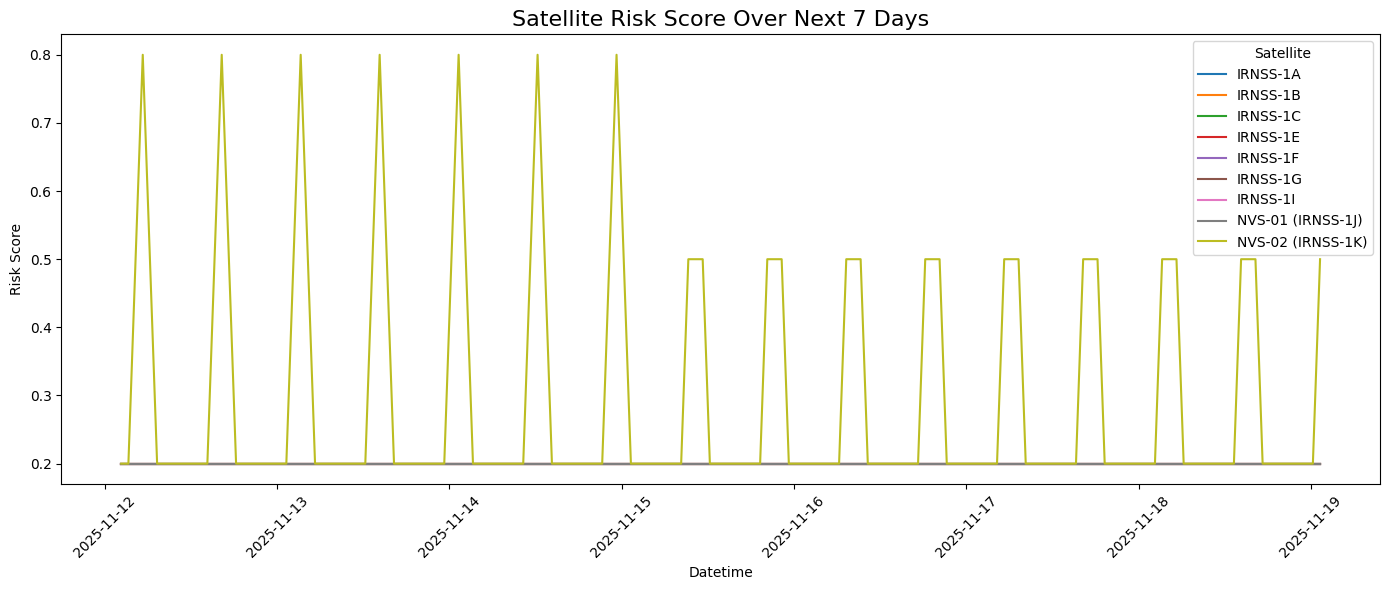

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load predictions
df = pd.read_csv("data/ISRO_Future_Risk.csv")
df['datetime'] = pd.to_datetime(df['datetime'])

# Plot risk score over time
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='datetime', y='risk_score', hue='satellite_name', palette='tab10')
plt.title("Satellite Risk Score Over Next 7 Days", fontsize=16)
plt.xlabel("Datetime")
plt.ylabel("Risk Score")
plt.xticks(rotation=45)
plt.legend(title='Satellite')
plt.tight_layout()
plt.show()


# 3D Orbit + Risk Visualization

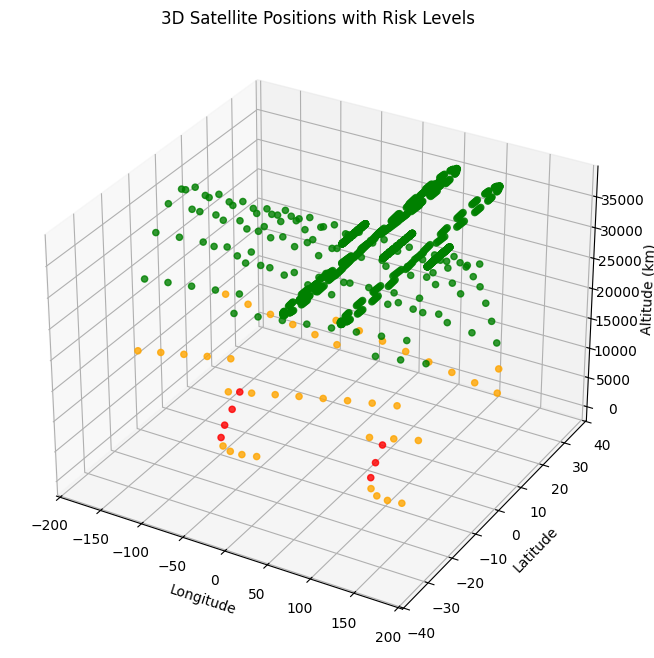

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Sample 3D scatter: Lat, Lon, Altitude
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Color by risk class
colors = df['risk_class'].map({'Low':'green','Medium':'orange','High':'red'})

ax.scatter(df['lon'], df['lat'], df['altitude_km'], c=colors, s=20, alpha=0.8)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Altitude (km)')
ax.set_title('3D Satellite Positions with Risk Levels')
plt.show()


# Animated Satellite Risk Map (Plotly)

In [23]:
import plotly.express as px

fig = px.scatter_geo(df, lat='lat', lon='lon', color='risk_class',
                     animation_frame=df['datetime'].dt.strftime('%Y-%m-%d %H:%M'),
                     hover_name='satellite_name', size='risk_score',
                     projection='orthographic', title='Satellite Risk Animation')

fig.show()
